In [84]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
warnings.simplefilter("ignore", UserWarning)

In [85]:
figure_dir = Path('../figures')
figure_dir.mkdir(exist_ok=True, parents=True)

empirics_dir = 'empirics'

In [216]:
# different colors for attention values
c_semantic='deeppink'
c_positional='royalblue'
c_att = 'rebeccapurple'

# different colors for the lienar student
c_lin = 'orange'

# colors for the phase transition borders
c_attlin = 'crimson' 
c_spinodal = 'forestgreen'

# color for changing specific parameters
c_no_col = 'black'


cmap_uninf = LinearSegmentedColormap.from_list('INF-UNINF',
                                                   [mcolors.to_rgba(c_semantic)[:3], (1, 1, 1), mcolors.to_rgba(c_positional)[:3]], N=100)
cmap_attlin = LinearSegmentedColormap.from_list('INF-UNINF',
                                                   [mcolors.to_rgba(c_lin)[:3], (1, 1, 1), mcolors.to_rgba(c_att)[:3]], N=100)
cmap_pos = LinearSegmentedColormap.from_list('INF-UNINF',
                                                   [mcolors.to_rgba('#8DE0A8')[:3],
                                                    mcolors.to_rgba('#93FFE0')[:3],
                                                    mcolors.to_rgba('#85EFFF')[:3],
                                                    mcolors.to_rgba('#6BBFFF')[:3],
                                                    mcolors.to_rgba(c_positional)[:3]], N=100)
cmap_att = LinearSegmentedColormap.from_list('INF-UNINF',
                                                   [mcolors.to_rgba('#FFE0B6')[:3],
                                                    mcolors.to_rgba('#FFB48C')[:3],
                                                    mcolors.to_rgba('#FF8166')[:3],
                                                    mcolors.to_rgba('#FF3E3B')[:3],
                                                    mcolors.to_rgba(c_semantic)[:3]], N=100)

In [215]:
#6BBFFF


(65.0, 105.0, 225.0)

# Standard A 

In [87]:
theory = {
    'sigma-0.5': {
        'spinodal': {
            'alpha_cross': np.sort([0.5480511155124588,0.7071599112677189,0.9277860822926854,1.2410177405149914,1.06,1.4541109691229464,1.93929723421423,1.7505718608649372,0.8180015676221762]),
            'omegas':np.sort([0.,.1,.2,.3,.25,.35,.425,.4,.15]),
        },
        'att-linear': {
            'alpha_cross': np.sort([0.7224524901475151,0.8505675450846425, 1.0714067387463304, 1.4505799369795134,1.2254411566145098,1.749529526524848,1.9932320281583897,0.941534866004223,0.7652803696599021,1.5843728192149278,1.32705219011143,0.8076328324972342]),
            'omegas':np.sort([0.,.1,.2,.3,.25,.35,.38,.15,.05,0.325,.275,0.075]),
        }
    }
}

df_nothing = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.3_agno.csv') #fixed point that learns nothing
df_positional = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.3_para.csv') #positional
df_semantic = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.3.csv') #semantic

#df_positional = pd.read_csv('results/theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.5_para.csv') #positional
#df_semantic = pd.read_csv('results/theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.5.csv') #semantic


df_spinodal = pd.DataFrame(theory['sigma-0.5']['spinodal']).set_index('omegas')
df_attlin = pd.DataFrame(theory['sigma-0.5']['att-linear']).set_index('omegas')

# todo: para and ferromagnetic fixed point for omega=0.3, their theta and their free energy

In [88]:
def plot_spinodal(ax,label=''):
    ax.plot(theory['sigma-0.5']['spinodal']['alpha_cross'], theory['sigma-0.5']['spinodal']['omegas'], label=label, color=c_spinodal, linestyle='--', linewidth=2)
    
def plot_att_linear(ax,label=''):
    ax.plot(theory['sigma-0.5']['att-linear']['alpha_cross'], theory['sigma-0.5']['att-linear']['omegas'], label=label, color=c_attlin, linestyle='--', linewidth=2)
    
def plot_spinodal_faint(ax,label=''):
    ax.plot(theory['sigma-0.5']['spinodal']['alpha_cross'], theory['sigma-0.5']['spinodal']['omegas'], label=label, color=c_spinodal, linestyle='--', linewidth=2,alpha=0.3)
    
def plot_att_linear_faint(ax,label=''):
    ax.plot(theory['sigma-0.5']['att-linear']['alpha_cross'], theory['sigma-0.5']['att-linear']['omegas'], label=label, color=c_attlin, linestyle='--', linewidth=2,alpha=0.3)

In [89]:
df = pd.read_csv('empirics/results_mean_standardA.csv')
df_std = pd.read_csv('empirics/results_std_standardA.csv')

In [90]:
d=1000
L=2
r=1
delta=0.4
lmbda_linear = 0.0001
sigma=0.5
lmbda=0.01
omega=0.3

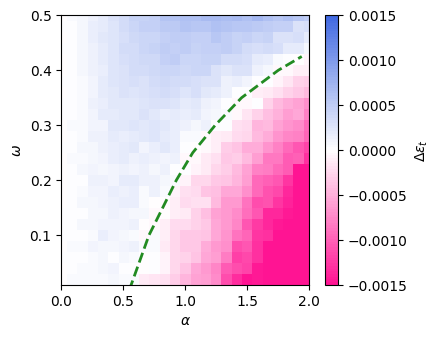

25 25


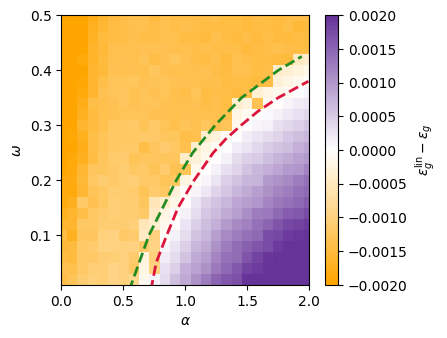

In [91]:
def phase_diagrams(df,name=''):

    fig=plt.figure(figsize=(4,3.5))
    d=1000
    L=2
    r=1
    sigma=0.5
    delta=0.4
    lmbda_linear = 0.0001
    lmbda=0.01

    lin_error = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).linear_gen_error_mean
    lin_loss = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).linear_gen_error_mean
    att_error_informed = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).attention_gen_error_mean
    att_error_positional = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).attention_gen_error_mean
    att_train_loss_informed = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).attention_train_error_mean
    att_train_loss_positional = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega<=0.5][df.sigma==sigma].set_index(['alpha','omega']).attention_train_error_mean

    mask=(att_train_loss_informed<= att_train_loss_positional)*1
    mask2=(att_train_loss_informed>= att_train_loss_positional)*1
    
    att_error_informed=mask*att_error_informed+mask2*att_error_positional
    
    loss_diff = (att_train_loss_informed - att_train_loss_positional).reset_index()#.unstack()
    error_diff2 = (lin_error-att_error_informed).reset_index()
    
    

    vmax=0.0015
    alphas = sorted(loss_diff.alpha.unique())
    omegas = sorted(loss_diff.omega.unique())
    plt.pcolor(alphas,omegas,loss_diff.attention_train_error_mean.values.reshape(len(alphas),len(omegas))/1000,vmin=-vmax,vmax=vmax,cmap=cmap_uninf)


    #plt.scatter(loss_diff.alpha,loss_diff.omega,c=loss_diff.attention_train_error_mean/1000,vmin=-vmax,vmax=vmax,s=100,cmap=cmap_uninf)
    plt.colorbar(label=r'$\Delta \epsilon_t$')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\omega$')
    if name == '':
        plot_spinodal(plt.gca())
    #plot_att_linear(plt.gca())
    plt.ylim(0.01,0.5)
    plt.xlim(0,2.0)
    plt.savefig(figure_dir / f'attention_train_error_pd{name}.pdf', bbox_inches='tight')
    plt.show()

    fig=plt.figure(figsize=(4,3.5))
    vmax = 0.002
    alphas = sorted(error_diff2.alpha.unique())
    omegas = sorted(error_diff2.omega.unique())
    print(len(alphas),len(omegas))
    plt.pcolor(alphas,omegas,error_diff2[0].values.reshape(len(alphas),len(omegas)),vmin=-vmax,vmax=vmax,cmap=cmap_attlin)

    #plt.scatter(error_diff2.alpha,error_diff2.omega,c=error_diff2[0],s=100,vmin=-vmax,vmax=vmax,cmap=cmap_attlin)
    plt.colorbar(label=r'$\epsilon^{\mathrm{lin}}_g-\epsilon_g$')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\omega$')
    if name == '':
        plot_spinodal(plt.gca())
        plot_att_linear(plt.gca())
    plt.ylim(0.01,0.5)
    plt.xlim(0,2.0)
    plt.savefig(figure_dir / f'attention_gen_error_pd{name}.pdf', bbox_inches='tight')
    plt.show()

phase_diagrams(df)

In [92]:
d=1000
L=2
r=1
delta=0.4
omega=0.34
lmbda_linear = 0.0001
sigma=0.5
lmbda=0.01

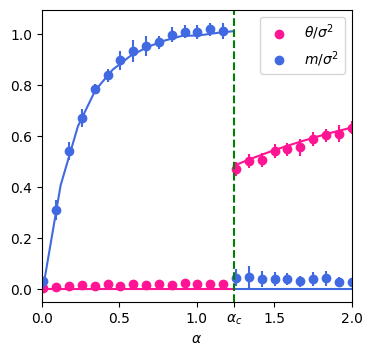

In [93]:
fig=plt.figure(figsize=(4,3.8))
omega=0.3
condition = (
    (df['omega'] == omega) &
    (df['sigma'] == sigma) &
    (df['attention_lmbda'] == lmbda) &
    (df['optim'] == 'GD')
)

dfi = df.loc[condition & (df['informed'] == True)].set_index(['alpha', 'omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['alpha', 'omega'])

condition_std = (
    (df_std['omega'] == omega) &
    (df_std['sigma'] == sigma) &
    (df_std['attention_lmbda'] == lmbda) &
    (df_std['optim'] == 'GD')
)

dfi_std = df_std.loc[condition_std & (df_std['informed'] == True)].set_index(['alpha', 'omega'])
dfu_std = df_std.loc[condition_std & (df_std['informed'] == False)].set_index(['alpha', 'omega'])

dfx = (dfu.attention_train_error_mean-dfi.attention_train_error_mean).reset_index()
dfx_std = (dfu_std.attention_train_error_mean+dfi_std.attention_train_error_mean).reset_index()

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)

# todo add theory

d = 1000

dfi_std.reset_index(inplace = True)
dfu_std.reset_index(inplace = True)




#plt.plot(df_semantic.alpha,df_semantic.theta/sigma**2, 
#         label='semantic', color=c_semantic,ls="--")
plt.plot(df_semantic[df_semantic["alpha"]>=1.24].alpha,df_semantic[df_semantic["alpha"]>=1.24].theta/sigma**2, 
          color=c_semantic)
plt.plot(df_positional[df_positional["alpha"]>=1.24].alpha,df_positional[df_positional["alpha"]>=1.24].theta/sigma**2, color=c_positional)
#plt.plot(df_positional[df_positional["alpha"]>=1.24].alpha,df_positional[df_positional["alpha"]>=1.24].theta/sigma**2,
#         label='positional', color=c_positional)
plt.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_theta_mean,label=r'$\theta/\sigma^2$', color=c_semantic)
plt.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_theta_mean,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_theta_mean, color=c_semantic, linestyle='None')
plt.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_theta_mean, color=c_semantic)
plt.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_theta_mean,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_theta_mean, color=c_semantic, linestyle='None')



plt.plot(df_semantic[df_semantic["alpha"]<=1.24].alpha,df_semantic[df_semantic["alpha"]<=1.24].m/sigma**2,  color=c_semantic)
#plt.plot(df_positional.alpha,df_positional.m/sigma**2, label='positional', color=c_positional,linestyle="--")
plt.plot(df_positional[df_positional["alpha"]<=1.24].alpha,df_positional[df_positional["alpha"]<=1.24].m/sigma**2,
    color=c_positional)
plt.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_mag_mean/sigma**2, color=c_positional)
plt.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_mag_mean/sigma**2,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_mag_mean/sigma**2, color=c_positional, linestyle='None')
plt.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_mag_mean/sigma**2,label=r'$m/\sigma^2$', color=c_positional)
plt.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_mag_mean/sigma**2,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_mag_mean/sigma**2, color=c_positional, linestyle='None')

plt.xlabel(r'$\alpha$')

plt.axvline(df_spinodal.loc[0.3].alpha_cross,ymin=0.0, ymax=1, color="g", ls="--")
plt.xticks(ticks=list(plt.xticks()[0]) + [df_spinodal.loc[0.3].alpha_cross],labels=[str(i) for i in plt.xticks()[0]]+[r"$\alpha_c$"])



plt.legend()
plt.xlim(0.0,2.0)
plt.savefig(figure_dir / 'attention_overlap_m_theta.pdf', bbox_inches='tight')
plt.show()




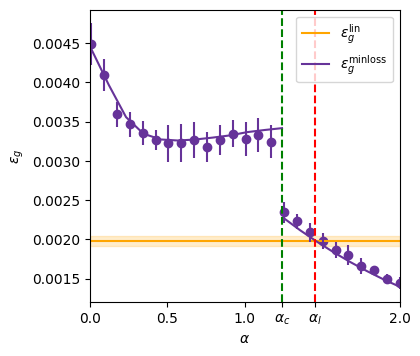

In [94]:
fig=plt.figure(figsize=(4,3.8))
omega=0.3
condition = (
    (df['omega'] == omega) &
    (df['sigma'] == sigma) &
    (df['attention_lmbda'] == lmbda) &
    (df['optim'] == 'GD')
)

dfi = df.loc[condition & (df['informed'] == True)].set_index(['alpha', 'omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['alpha', 'omega'])

condition_std = (
    (df_std['omega'] == omega) &
    (df_std['sigma'] == sigma) &
    (df_std['attention_lmbda'] == lmbda) &
    (df_std['optim'] == 'GD')
)

dfi_std = df_std.loc[condition_std & (df_std['informed'] == True)].set_index(['alpha', 'omega'])
dfu_std = df_std.loc[condition_std & (df_std['informed'] == False)].set_index(['alpha', 'omega'])

dfx = (dfu.attention_train_error_mean-dfi.attention_train_error_mean).reset_index()
dfx_std = (dfu_std.attention_train_error_mean+dfi_std.attention_train_error_mean).reset_index()

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)

dfi_std.reset_index(inplace=True)
dfu_std.reset_index(inplace=True)

# todo add theory

d = 1000

c_neutral = c_att#'black'

lin_error = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega==omega][df.sigma==sigma]#.mean()
plt.axhline(lin_error.linear_gen_error_mean.mean(), color=c_lin, label=r'$\epsilon_g^{\mathrm{lin}}$')#,ls="--")
# fill between the std
plt.fill_between([0,2],lin_error.linear_gen_error_mean.mean()-lin_error.linear_gen_error_mean.std(),lin_error.linear_gen_error_mean.mean()+lin_error.linear_gen_error_mean.std(),color=c_lin,alpha=0.2)

plt.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_gen_error_mean, color=c_neutral)
plt.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_gen_error_mean,color=c_neutral)
plt.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_gen_error_mean,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_gen_error_mean, color=c_neutral, linestyle='None')
plt.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_gen_error_mean,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_gen_error_mean, color=c_neutral, linestyle='None')

#print(df_nothing.columns)
#plt.plot(df_nothing.alpha,df_nothing.mse/2, label='uninformed dot-p attention', color='black')
plt.plot(df_positional[df_positional["alpha"]<1.25].alpha,df_positional[df_positional["alpha"]<1.25].mse/2, color=c_neutral,label=r'$\epsilon_g^{\mathrm{minloss}}$')
plt.plot(df_semantic[df_semantic["alpha"]>1.24].alpha,df_semantic[df_semantic["alpha"]>1.24].mse/2, color=c_neutral)

plt.axvline(df_spinodal.loc[0.3].alpha_cross,ymin=0, ymax=1, color="g", ls="--")
plt.axvline(1.45,ymin=0, ymax=1, color="r", ls="--")

plt.xticks(ticks=[0.,.5,1.,2.] + [df_spinodal.loc[0.3].alpha_cross,1.45],labels=[str(i) for i in [0.,.5,1.,2.]]+[r"$\alpha_c$",r"$\alpha_l$"])


plt.ylabel(r'$\epsilon_g$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.xlim(0.0,2.0)
plt.savefig(figure_dir / 'attention_gen_error_global_only.pdf', bbox_inches='tight')
plt.show()


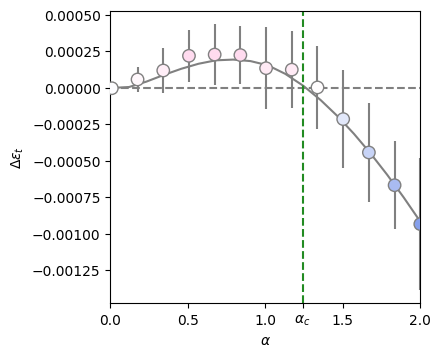

In [95]:


fig=plt.figure(figsize=(4,3.8))
omega=0.3
condition = (
    (df['omega'] == omega) &
    (df['sigma'] == sigma) &
    (df['attention_lmbda'] == lmbda) &
    (df['optim'] == 'GD')
)

dfi = df.loc[condition & (df['informed'] == True)].set_index(['alpha', 'omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['alpha', 'omega'])

condition_std = (
    (df_std['omega'] == omega) &
    (df_std['sigma'] == sigma) &
    (df_std['attention_lmbda'] == lmbda) &
    (df_std['optim'] == 'GD')
)

dfi_std = df_std.loc[condition_std & (df_std['informed'] == True)].set_index(['alpha', 'omega'])
dfu_std = df_std.loc[condition_std & (df_std['informed'] == False)].set_index(['alpha', 'omega'])

dfx = (dfu.attention_train_error_mean-dfi.attention_train_error_mean).reset_index()
dfx_std = (dfu_std.attention_train_error_mean+dfi_std.attention_train_error_mean).reset_index()

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)

# todo add theory

d = 1000



vmax=0.0015
plt.plot(df_semantic.alpha,-df_semantic.Phi+df_positional.Phi,c='grey')
plt.errorbar(dfx.alpha[::2],(-dfx.attention_train_error_mean/d)[::2],yerr=(dfx_std.attention_train_error_mean/d)[::2], color='grey', linestyle='None')
plt.axhline(0,linestyle='--',color='grey')
plt.scatter(dfx.alpha[::2], (-dfx.attention_train_error_mean/d)[::2], c=(dfx.attention_train_error_mean/d)[::2], vmin=-vmax, vmax=vmax, cmap=cmap_uninf, s=80, zorder=100, linewidths=1, edgecolors='grey')
plt.axvline(df_spinodal.loc[0.3].alpha_cross, color=c_spinodal,ls="--")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Delta \epsilon_t}$')
plt.xlim(0.0,2.0)

#print(plt.xticks())
plt.xticks(ticks=list(plt.xticks()[0]) + [df_spinodal.loc[0.3].alpha_cross],labels=[str(i) for i in plt.xticks()[0]]+[r"$\alpha_c$"])

plt.savefig(figure_dir / 'attention_free_entropy.pdf', bbox_inches='tight')

plt.show()


[-0.5  0.   0.5  1.   1.5  2.   2.5]


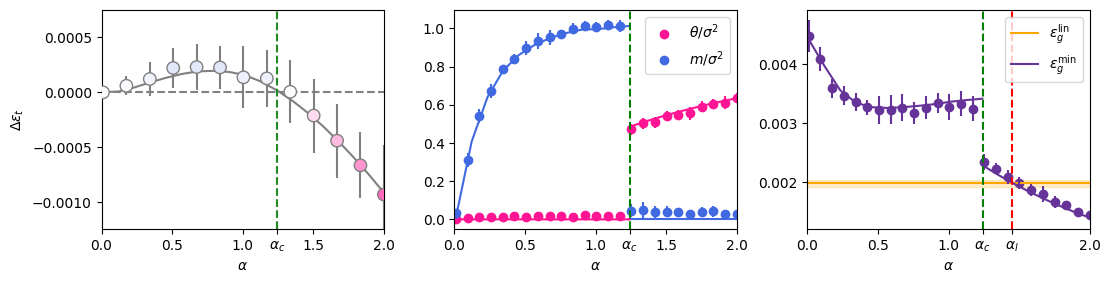

In [96]:
factor = 0.75
c_neutral = c_att#'black'

fig, axes = plt.subplots(1,3,figsize=(17*factor,3.8*factor))

omega=0.3
condition = (
    (df['omega'] == omega) &
    (df['sigma'] == sigma) &
    (df['attention_lmbda'] == lmbda) &
    (df['optim'] == 'GD')
)

dfi = df.loc[condition & (df['informed'] == True)].set_index(['alpha', 'omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['alpha', 'omega'])


dfi_std = df_std.loc[condition & (df_std['informed'] == True)].set_index(['alpha', 'omega'])
dfu_std = df_std.loc[condition & (df_std['informed'] == False)].set_index(['alpha', 'omega'])

dfx = (dfu.attention_train_error_mean-dfi.attention_train_error_mean).reset_index()
dfx_std = (dfu_std.attention_train_error_mean+dfi_std.attention_train_error_mean).reset_index()

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)

# todo add theory

d = 1000

# first axes
ax = axes[0]
vmax=0.0015
ax.plot(df_semantic.alpha,-df_semantic.Phi+df_positional.Phi,c='grey')
ax.errorbar(dfx.alpha[::2],(-dfx.attention_train_error_mean/d)[::2],yerr=(dfx_std.attention_train_error_mean/d)[::2], color='grey', linestyle='None')
ax.axhline(0,linestyle='--',color='grey')
ax.scatter(dfx.alpha[::2], (-dfx.attention_train_error_mean/d)[::2], c=(-dfx.attention_train_error_mean/d)[::2], vmin=-vmax, vmax=vmax, cmap=cmap_uninf, s=80, zorder=100, linewidths=1, edgecolors='grey')
ax.axvline(df_spinodal.loc[0.3].alpha_cross, color=c_spinodal,ls="--")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\Delta \epsilon_t}$')

#print(plt.xticks())
print(ax.get_xticks())
ax.set_ylim(-0.00125,0.00075)
#ax.set_yticks(np.arange( -0.00125,0.00075, 0.00025))

ax.set_xticks(ticks=list(ax.get_xticks()) + [df_spinodal.loc[0.3].alpha_cross],labels=[str(i) for i in ax.get_xticks()]+[r"$\alpha_c$"])
ax.set_xlim(0.0,2.0)
# second axes 

dfi = df.loc[condition & (df['informed'] == True)].set_index(['alpha', 'omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['alpha', 'omega'])

dfi_std = df_std.loc[condition & (df_std['informed'] == True)].set_index(['alpha', 'omega'])
dfu_std = df_std.loc[condition & (df_std['informed'] == False)].set_index(['alpha', 'omega'])

dfx = (dfu.attention_train_error_mean-dfi.attention_train_error_mean).reset_index()
dfx_std = (dfu_std.attention_train_error_mean+dfi_std.attention_train_error_mean).reset_index()

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)
ax = axes[1]


dfi_std.reset_index(inplace = True)
dfu_std.reset_index(inplace = True)


#plt.plot(df_semantic.alpha,df_semantic.theta/sigma**2, 
#         label='semantic', color=c_semantic,ls="--")
ax.plot(df_semantic[df_semantic["alpha"]>=1.24].alpha,df_semantic[df_semantic["alpha"]>=1.24].theta/sigma**2, 
          color=c_semantic)
ax.plot(df_positional[df_positional["alpha"]>=1.24].alpha,df_positional[df_positional["alpha"]>=1.24].theta/sigma**2, color=c_positional)
#plt.plot(df_positional[df_positional["alpha"]>=1.24].alpha,df_positional[df_positional["alpha"]>=1.24].theta/sigma**2,
#         label='positional', color=c_positional)
ax.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_theta_mean,label=r'$\theta/\sigma^2$', color=c_semantic)
ax.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_theta_mean,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_theta_mean, color=c_semantic, linestyle='None')
ax.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_theta_mean, color=c_semantic)
ax.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_theta_mean,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_theta_mean, color=c_semantic, linestyle='None')



ax.plot(df_semantic[df_semantic["alpha"]<=1.24].alpha,df_semantic[df_semantic["alpha"]<=1.24].m/sigma**2,  color=c_semantic)
#plt.plot(df_positional.alpha,df_positional.m/sigma**2, label='positional', color=c_positional,linestyle="--")
ax.plot(df_positional[df_positional["alpha"]<=1.24].alpha,df_positional[df_positional["alpha"]<=1.24].m/sigma**2,
    color=c_positional)
ax.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_mag_mean/sigma**2, color=c_positional)
ax.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_mag_mean/sigma**2,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_mag_mean/sigma**2, color=c_positional, linestyle='None')
ax.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_mag_mean/sigma**2,label=r'$m/\sigma^2$', color=c_positional)
ax.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_mag_mean/sigma**2,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_mag_mean/sigma**2, color=c_positional, linestyle='None')

ax.set_xlabel(r'$\alpha$')

ax.axvline(df_spinodal.loc[0.3].alpha_cross,ymin=0.0, ymax=1, color="g", ls="--")
ax.set_xticks(ticks=list(ax.get_xticks()) + [df_spinodal.loc[0.3].alpha_cross],labels=[str(i) for i in ax.get_xticks()]+[r"$\alpha_c$"])



ax.legend()
ax.set_xlim(0.0,2.0)

# third axes
c_neutral = c_att#'black'
ax =axes[2]
lin_error = df[df.L==L][df.r==r][df.d==d][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega==omega][df.sigma==sigma]#.mean()
ax.axhline(lin_error.linear_gen_error_mean.mean(), color=c_lin, label=r'$\epsilon_g^{\mathrm{lin}}$')#,ls="--")
# fill between the std
ax.fill_between([0,2],lin_error.linear_gen_error_mean.mean()-lin_error.linear_gen_error_mean.std(),lin_error.linear_gen_error_mean.mean()+lin_error.linear_gen_error_mean.std(),color=c_lin,alpha=0.2)

ax.scatter(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_gen_error_mean, color=c_neutral)
ax.scatter(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_gen_error_mean,color=c_neutral)
ax.errorbar(dfi[dfi["alpha"]>=1.24].alpha,dfi[dfi["alpha"]>=1.24].attention_gen_error_mean,yerr=dfi_std[dfi_std["alpha"]>=1.24].attention_gen_error_mean, color=c_neutral, linestyle='None')
ax.errorbar(dfu[dfu["alpha"]<=1.24].alpha,dfu[dfu["alpha"]<=1.24].attention_gen_error_mean,yerr=dfu_std[dfu_std["alpha"]<=1.24].attention_gen_error_mean, color=c_neutral, linestyle='None')

#print(df_nothing.columns)
#plt.plot(df_nothing.alpha,df_nothing.mse/2, label='uninformed dot-p attention', color='black')
ax.plot(df_positional[df_positional["alpha"]<1.25].alpha,df_positional[df_positional["alpha"]<1.25].mse/2, color=c_neutral,label=r'$\epsilon_g^{\mathrm{min}}$')
ax.plot(df_semantic[df_semantic["alpha"]>1.24].alpha,df_semantic[df_semantic["alpha"]>1.24].mse/2, color=c_neutral)

ax.axvline(df_spinodal.loc[0.3].alpha_cross,ymin=0, ymax=1, color="g", ls="--")
ax.axvline(1.45,ymin=0, ymax=1, color="r", ls="--")

ax.set_xticks(ticks=[0.,.5,1.,2.] + [df_spinodal.loc[0.3].alpha_cross,1.45],labels=[str(i) for i in [0.,.5,1.,2.]]+[r"$\alpha_c$",r"$\alpha_l$"])

ax.set_xlabel(r'$\alpha$')
ax.legend()
ax.set_xlim(0.0,2.0)

fig.subplots_adjust(wspace=0.25)

plt.savefig(figure_dir / 'all_omega_0.3.pdf', bbox_inches='tight')

plt.show()



# Scaling behaviour

In [198]:
df = pd.read_csv('empirics/results_scaling.csv')
df_std = pd.read_csv('empirics/results_std_scaling.csv')
df_orig = pd.read_csv('empirics/results_scaling_orig.csv')

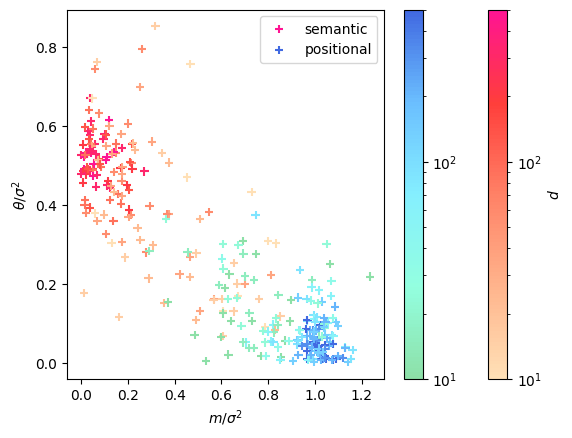

In [220]:
df_orig = df_orig[df_orig.alpha==1.5]
df_orig = df_orig.groupby('d').head(30)
sigma=0.5
plt.scatter(df_orig[df_orig.informed].attention_mag_mean/sigma**2, df_orig[df_orig.informed].attention_theta_mean, marker='+',c=df_orig[df_orig.informed].d, cmap=cmap_att, norm=colors.LogNorm())
plt.colorbar(label=r'$d$')
plt.scatter(df_orig[~df_orig.informed].attention_mag_mean/sigma**2,df_orig[~df_orig.informed].attention_theta_mean,  marker='+',c=df_orig[~df_orig.informed].d, cmap=cmap_pos
            , norm=colors.LogNorm())
plt.colorbar()
plt.scatter([],[],marker='+',c=c_semantic,label='semantic')
plt.scatter([],[],marker='+',c=c_positional,label='positional')

plt.legend()
plt.xlabel(r'$m/\sigma^2$')
plt.ylabel(r'$\theta/\sigma^2$')
plt.savefig(figure_dir / 'd_scaling_omega_m_theta.pdf', bbox_inches='tight')

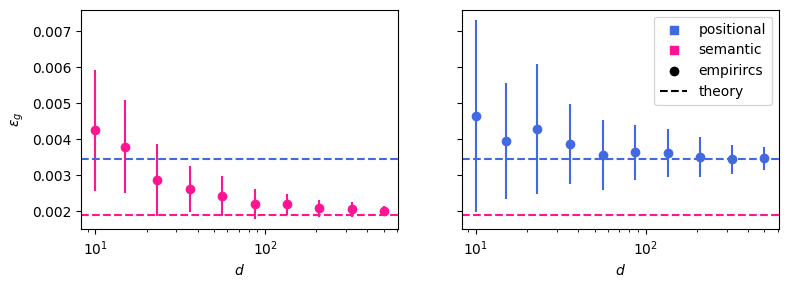

In [193]:
alpha = 1.5

fig, axes = plt.subplots(1,2,figsize=(12*factor,3.8*factor),sharey=True)

condition = (
        (df['omega'] == omega) &
        (df['sigma'] == sigma) &
        (df['attention_lmbda'] == lmbda) &
        (df['optim'] == 'GD') &
        (df['alpha'] == alpha)
    )

dfi = df.loc[condition & (df['informed'] == True)].set_index(['d','omega'])
dfu = df.loc[condition & (df['informed'] == False)].set_index(['d','omega'])

dfi_std = df_std.loc[condition & (df_std['informed'] == True)].set_index(['d','omega'])
dfu_std = df_std.loc[condition & (df_std['informed'] == False)].set_index(['d','omega'])

dfi.reset_index(inplace=True)
dfu.reset_index(inplace=True)
dfi_std.reset_index(inplace = True)
dfu_std.reset_index(inplace = True)

mse_s = (df_semantic.mse.values[4]+df_semantic.mse.values[5])/2
mse_p = (df_positional.mse.values[4]+df_positional.mse.values[5])/2
    
    
# third axes
c_neutral = c_att#'black'
ax =  axes[0]

ax.scatter(dfi.d,dfi.attention_gen_error_mean, color=c_semantic)

ax.errorbar(dfi.d,dfi.attention_gen_error_mean,yerr=dfi_std.attention_gen_error_mean, color=c_semantic, linestyle='None')
ax.set_ylabel(r'$\epsilon_g$')
ax.axhline(mse_s/2, color=c_semantic,linestyle='dashed')
ax.axhline(mse_p/2, color=c_positional,linestyle='dashed')
ax.set_xlabel(r'$d$')
ax.set_xscale('log')

ax =  axes[1]

ax.scatter(dfu.d,dfu.attention_gen_error_mean,color=c_positional)
ax.errorbar(dfu.d,dfu.attention_gen_error_mean,yerr=dfu_std.attention_gen_error_mean, color=c_positional, linestyle='None')
ax.axhline(mse_s/2, color=c_semantic,linestyle='dashed')
ax.axhline(mse_p/2, color=c_positional,linestyle='dashed')

ax.scatter([],[], color=c_positional,label='positional',marker='s')
ax.scatter([],[], color=c_semantic,label='semantic',marker='s')
ax.scatter([],[], color='black',label='empirircs')
ax.plot([],[], color='black',label='theory',linestyle='dashed')
ax.set_xlabel(r'$d$')
ax.set_xscale('log')
ax.legend()
plt.savefig(figure_dir / 'd_scaling_omega_0.3.pdf', bbox_inches='tight')

# Alternative A

In [62]:
df = pd.read_csv('empirics/results_mean_otherA.csv')
df_std = pd.read_csv('empirics/results_std_otherA.csv')

In [63]:
theory = {
    'sigma-0.5': {
        'spinodal': {
            'alpha_cross': np.sort([0.5480511155124588,0.7071599112677189,0.9277860822926854,1.2410177405149914,1.06,1.4541109691229464,1.93929723421423,1.7505718608649372,0.8180015676221762]),
            'omegas':np.sort([0.,.1,.2,.3,.25,.35,.425,.4,.15]),
        },
        'att-linear': {
            'alpha_cross': np.sort([0.7224524901475151,0.8505675450846425, 1.0714067387463304, 1.4505799369795134,1.2254411566145098,1.749529526524848,1.9932320281583897,0.941534866004223,0.7652803696599021,1.5843728192149278,1.32705219011143,0.8076328324972342]),
            'omegas':np.sort([0.,.1,.2,.3,.25,.35,.38,.15,.05,0.325,.275,0.075]),
        }
    }
}

#df_nothing = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.3_agno.csv') #fixed point that learns nothing
df_positional = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.14_para_Aalt.csv') #positional
df_semantic = pd.read_csv('theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.14_Aalt.csv') #semantic
df_nothing = df_semantic
#df_positional = pd.read_csv('results/theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.5_para.csv') #positional
#df_semantic = pd.read_csv('results/theory/repl_softmax_Mixed_sig0.5_lamb0.01_omega0.5.csv') #semantic


df_spinodal = pd.DataFrame(theory['sigma-0.5']['spinodal']).set_index('omegas')
df_attlin = pd.DataFrame(theory['sigma-0.5']['att-linear']).set_index('omegas')

# todo: para and ferromagnetic fixed point for omega=0.3, their theta and their free energy

In [64]:
def plot_spinodal(ax,label=''):
    ax.plot(theory['sigma-0.5']['spinodal']['alpha_cross'], theory['sigma-0.5']['spinodal']['omegas'], label=label, color=c_spinodal, linestyle='--', linewidth=2)
    
def plot_att_linear(ax,label=''):
    ax.plot(theory['sigma-0.5']['att-linear']['alpha_cross'], theory['sigma-0.5']['att-linear']['omegas'], label=label, color=c_attlin, linestyle='--', linewidth=2)
    
def plot_spinodal_faint(ax,label=''):
    ax.plot(theory['sigma-0.5']['spinodal']['alpha_cross'], theory['sigma-0.5']['spinodal']['omegas'], label=label, color=c_spinodal, linestyle='--', linewidth=2,alpha=0.3)
    
def plot_att_linear_faint(ax,label=''):
    ax.plot(theory['sigma-0.5']['att-linear']['alpha_cross'], theory['sigma-0.5']['att-linear']['omegas'], label=label, color=c_attlin, linestyle='--', linewidth=2,alpha=0.3)

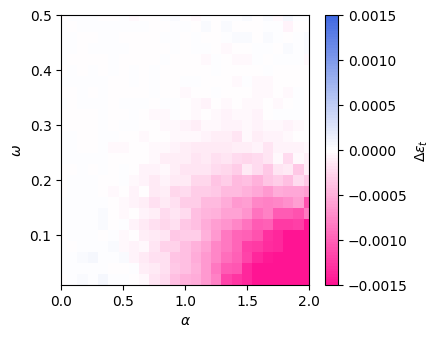

25 25


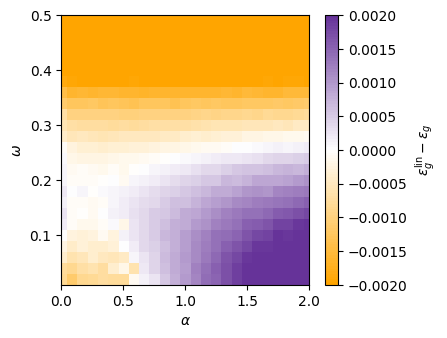

In [65]:
phase_diagrams(df,'otherA')

# Appendix slices

In [66]:
df = pd.read_csv('empirics/results_mean_standardA.csv')
df_std = pd.read_csv('empirics/results_std_standardA.csv')

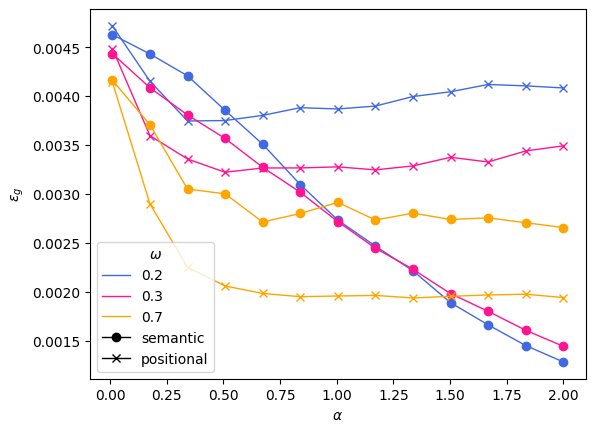

In [67]:
d=1000
L=2
r=1
sigma=0.5
delta=0.4
lmbda_linear = 0.0001
lmbda=0.01
colors = ['royalblue','deeppink','orange','rebeccapurple','crimson']
for i, omega in enumerate([0.2,0.3,0.7]):
    att_error_informed = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    att_error_positional = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    # todo: here we need to take the min of the train error actually, not the gen error!
    #att_error = np.min([att_error_informed, att_error_positional], axis=0)
    #att_error_informed = att_error_informed.reset_index()
    att_error_informed = att_error_informed.reset_index()
    att_error_positional = att_error_positional.reset_index()
    plt.plot(att_error_informed.alpha[::2],att_error_informed.attention_gen_error_mean[::2],lw=1,marker='o',color=colors[i])
    plt.plot(att_error_positional.alpha[::2],att_error_positional.attention_gen_error_mean[::2],lw=1,marker='x',color=colors[i])
    plt.plot([],[],label=omega,lw=1,color=colors[i])
plt.plot([],[],label='semantic',lw=1,color='black',marker='o')
plt.plot([],[],label='positional',lw=1,color='black',marker='x')
plt.legend(title=r'$\omega$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\epsilon_g$')
plt.savefig(figure_dir / 'omega_slices.pdf', bbox_inches='tight')

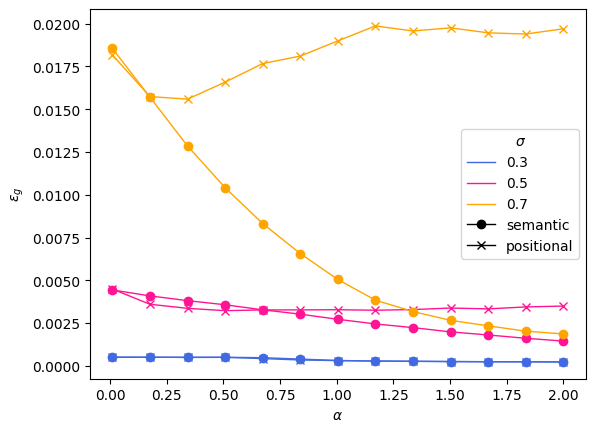

In [68]:
d=1000
L=2
r=1
sigma=0.5
delta=0.4
omega=0.3
lmbda_linear = 0.0001
lmbda=0.01
for i, sigma in enumerate([0.3,0.5,0.7]):
    att_error_informed = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    att_error_positional = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    # todo: here we need to take the min of the train error actually, not the gen error!
    #att_error = np.min([att_error_informed, att_error_positional], axis=0)
    #att_error_informed = att_error_informed.reset_index()
    att_error_informed = att_error_informed.reset_index()
    att_error_positional = att_error_positional.reset_index()
    plt.plot(att_error_informed.alpha[::2],att_error_informed.attention_gen_error_mean[::2],lw=1,marker='o',color=colors[i])
    plt.plot(att_error_positional.alpha[::2],att_error_positional.attention_gen_error_mean[::2],lw=1,marker='x',color=colors[i])
    plt.plot([],[],label=sigma,lw=1,color=colors[i])
plt.plot([],[],label='semantic',lw=1,color='black',marker='o')
plt.plot([],[],label='positional',lw=1,color='black',marker='x')
plt.legend(title=r'$\sigma$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\epsilon_g$')
plt.savefig(figure_dir / 'sigma_slices.pdf', bbox_inches='tight')

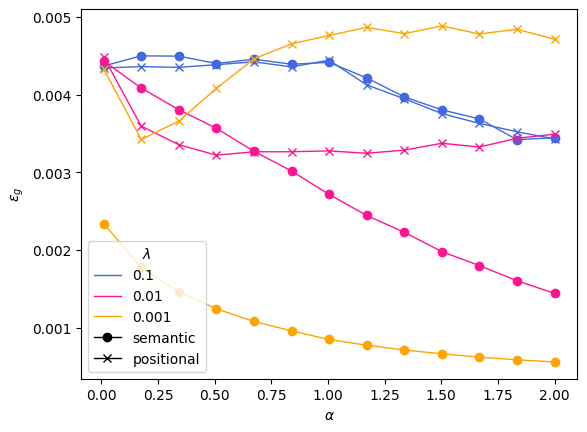

In [69]:
d=1000
L=2
r=1
sigma=0.5
delta=0.4
omega=0.3
lmbda_linear = 0.0001
sigma=0.5

for i,lmbda in enumerate([0.1,0.01,0.001]):
    att_error_informed = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==True][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    att_error_positional = df[df.L==L][df.r==r][df.d==d][df.sigma==sigma][df.attention_lmbda==lmbda][df.linear_lmbda==lmbda_linear][df.delta==delta][df.informed==False][df.optim=='GD'][df.omega==omega].set_index(['alpha']).attention_gen_error_mean
    # todo: here we need to take the min of the train error actually, not the gen error!
    #att_error = np.min([att_error_informed, att_error_positional], axis=0)
    #att_error_informed = att_error_informed.reset_index()
    att_error_informed = att_error_informed.reset_index()
    att_error_positional = att_error_positional.reset_index()
    plt.plot(att_error_informed.alpha[::2],att_error_informed.attention_gen_error_mean[::2],lw=1,marker='o',color=colors[i])
    plt.plot(att_error_positional.alpha[::2],att_error_positional.attention_gen_error_mean[::2],lw=1,marker='x',color=colors[i])
    plt.plot([],[],label=lmbda,lw=1,color=colors[i])
plt.plot([],[],label='semantic',lw=1,color='black',marker='o')
plt.plot([],[],label='positional',lw=1,color='black',marker='x')
plt.legend(title=r'$\lambda$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\epsilon_g$')
plt.savefig(figure_dir / 'lmbda_slices.pdf', bbox_inches='tight')

# R = 2

In [70]:
df = pd.read_csv('empirics/results_mean_r=2.csv')
df_std = pd.read_csv('empirics/results_std_r=2.csv')

(49, 19)


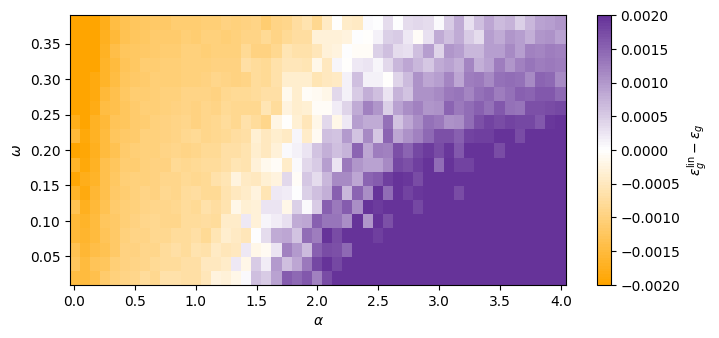

In [71]:
fig=plt.figure(figsize=(8,3.5))
vmax = 0.002
df = df[df.omega < 0.4][df.omega < 2.01]
error_diff = df.linear_gen_error_mean-df.attention_gen_error_mean
alphas = sorted(df.alpha.unique())
omegas = sorted(df.omega.unique())
#plt.scatter(df.alpha,df.omega,c=error_diff, vmin=-vmax,vmax=vmax,label='attention',cmap=cmap_attlin)
print(error_diff.values.reshape(len(alphas),len(omegas)).shape)
plt.pcolor(alphas,omegas ,error_diff.values.reshape(len(omegas),len(alphas)),vmin=-vmax,vmax=vmax,cmap=cmap_attlin)
plt.colorbar(label=r'$\epsilon^{\mathrm{lin}}_g-\epsilon_g$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\omega$')
plt.savefig(figure_dir / f'attention_gen_error_crossover_r=2.pdf', bbox_inches='tight')
plt.show()

# Comparison of GD and Adam

In [77]:
def group(df):
    return df.groupby(['d','L','r','delta','sigma','omega','attention_lmbda','linear_lmbda','alpha','informed','optim'])


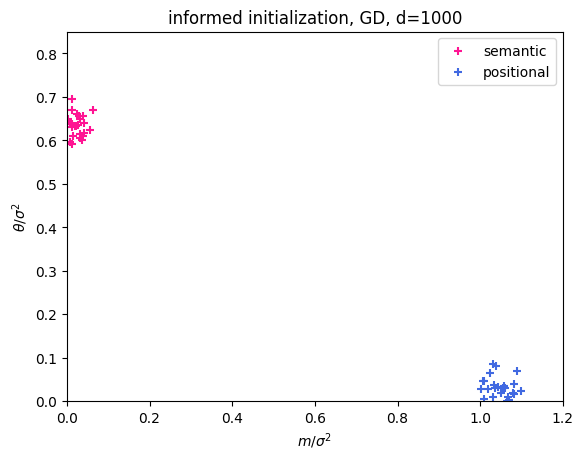

In [78]:
df = pd.read_csv('empirics/results_samples_standardA.csv')
df = group(df).head(24).reset_index()
sigma=0.5
plt.scatter(df[df.informed].attention_mag_mean/sigma**2, df[df.informed].attention_theta_mean,marker='+',color=c_semantic,label='semantic')
plt.scatter(df[~df.informed].attention_mag_mean/sigma**2, df[~df.informed].attention_theta_mean,marker='+',color=c_positional,label='positional')
plt.xlabel(r'$m/\sigma^2$')
plt.ylabel(r'$\theta/\sigma^2$')
plt.xlim(0,1.2)
plt.ylim(0,0.85)
plt.legend()
plt.title('informed initialization, GD, d=1000')
plt.savefig(figure_dir / f'init-vary-2.pdf', bbox_inches='tight')

141


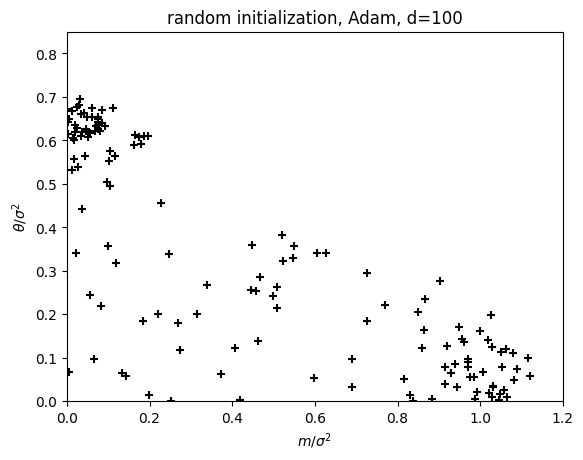

In [81]:
df = pd.read_csv('empirics/results_adam.csv')
print(len(df))
df = group(df).head(140).reset_index()
plt.scatter(df.attention_mag_mean/sigma**2, df.attention_theta_mean,marker='+',color='black',label='random')
plt.xlabel(r'$m/\sigma^2$')
plt.ylabel(r'$\theta/\sigma^2$')
plt.xlim(0,1.2)
plt.ylim(0,0.85)
plt.title('random initialization, Adam, d=100')
plt.savefig(figure_dir / f'init-vary-1.pdf', bbox_inches='tight')

# First Figure Landscape

/tmp/ipykernel_2956388/1450812528.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mean, covariance, num_points)


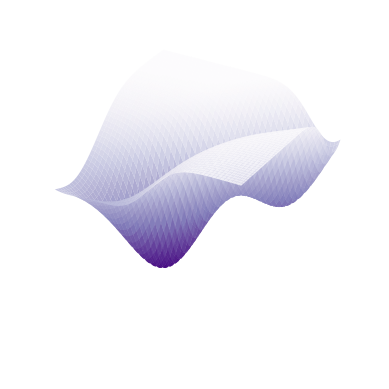

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate points from a Gaussian distribution
def generate_gaussian_points(mean, covariance, num_points):
    return np.random.multivariate_normal(mean, covariance, num_points)

# Parameters for Gaussian distributions
mean1 = np.array([10, 10])
covariance1 =  np.array([[3, 2], [2, 1]])

mean2 = np.array([0, 0])  # Increase the spacing
covariance2 = np.array([[1, -0.5], [-0.5, 1]])
covariance2 = np.array([[3, 2], [2, 1]])

# Adjustable parameters
spacing = 15  # Control the spacing between Gaussian distributions
random_points_ratio = 4  # Control the ratio of random points to Gaussian points

# Generate points from Gaussian distributions
a = 30
gaussian_points1 = generate_gaussian_points(mean1, covariance1, a)
gaussian_points2 = generate_gaussian_points(mean2, covariance2, a)

# Generate random uniformly sampled points
num_random_points = len(gaussian_points1) * random_points_ratio
uniform_points = np.random.uniform(low=-20, high=2, size=(int(num_random_points), 2))

# Concatenate all points
all_points = np.vstack((gaussian_points1, gaussian_points2, uniform_points))

# Calculate KDE for the points
kde = gaussian_kde(all_points.T)

# Create a meshgrid for 3D plotting
x_grid, y_grid = np.meshgrid(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100))
z_values = -kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))

# Reshape z_values to match the shape of x_grid and y_grid
z_values = z_values.reshape(x_grid.shape)

# Plot the 3D surface plot of KDE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_values, cmap='Purples_r', alpha=0.8)

# Remove grid and labels
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_axis_off()
plt.show()